# Milestone 1: Groups, Data, Website, and Extraction, Transformation, and Load

## Are public parks Accessible in Palm Beach County?

Name: Wesnahika Charles

Github Webpage Link: 

### Introduction

> In this project the general question I want to solve over all would be, within Palm Beach County Florida, are the public parks here accessible, in the sense that, are they accessible to bus stops, residential areas, train stations, etc. I would also like to figure out exactly where in Palm Beach County has the most accessible public parks and which has the least accessible ones. I have already hypothesized that areas near downtown West Palm Beach may have the most accessible parks due to the high concentration of public transport, however, given how I have lived in the area for some time, the parks are still a quite a distance away from the actual area. I would also think that areas more out towards Lake Okeechobee would be less accessible to considering, from what I’ve seen, how semi-rural and sparsely populated it is.
>
> The first piece of data I would utilize would be the basic location data of the parks in Palm Beach County sourced from the Florida Geospatial Open Data Portal. This will give me the name of the park, the address, the county (to which I would just filter on Palm Beach), the type of Park, whether it has a pool or as well as longitude and latitude. The question would be simple, what are the exact locations of these parks? This dataset would also help me figure out how many public parks we have in our county as well.
>
> The second part of this project would be how we would gauge accessibility and we would need a couple of data sources for this. With open data coming from Palm Beach TPA, we will be able to derive the location of all Amtrak and Tri-Rail Stations in Palm Beach County, using the Palm Beach County Open Data Page, we could also extract the bus stops that are in the area, with this we would be able to look at the amount of bus stops that are nearest to each park. The question I would ask using these datasets would be how many of these transit areas are located around these parks, and which location, say for example municipality (at a general level) or park has the most transit stops closest to them. I believe I will most likely measure this by counting the amount of transit areas that are less than a 2-mile radius, I could also just convert the distance between two longitude and latitude points to get the number of miles as well. 
>
> I will be working on this project by myself, allocating several hours a week to working on it and making progress, I will employ the use of git as version control to make sure that my progress is being saved correctly om GitHub. 

### Loading the Datasets

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import os
print(os.getcwd())

/home/jovyan/notebooks


#### First I will load the Actual Parks Data

In [36]:
Florida_Parks_df = pd.read_csv('Final Tutorial/Data/Park_and_Recreation_Areas%2C_2019.csv')

In [37]:
Florida_Parks_df.head()

,X,Y,FID,PARCELID,NAME,ADDRESS,CITY,ZIPCODE,COUNTY,TYPE,...,LONG_DD,MGRS,GOOGLEMAP,GCID,ACRES,DESCRIPT,FLAG,UPDATE_DAY,FGDLAQDATE,AUTOID
0,-80.834464,28.460235,1,23352800251,FAY LAKE WILDERNESS PARK,6300 FAY BLVD,COCOA,32927,BREVARD,NATURE PARK,...,-80.834470,17RNM1620648199,https://www.google.com/maps/place/17RNM1620648199,289,164.457,FAY LAKE WILDERNESS PARK,V,2012/02/02 00:00:00+00,2019/05/29 00:00:00+00,1
1,-80.695572,28.442414,2,233635001,KINGS PARK,995 CHASE HAMMOCK RD,MERRITT ISLAND,32953,BREVARD,NATURE PARK / WATER ACCESS,...,-80.695579,17RNM2980846251,https://www.google.com/maps/place/17RNM2980846251,290,241.735,KINGS PARK,V,2018/06/20 00:00:00+00,2019/05/29 00:00:00+00,2
2,-80.718832,28.446211,3,233634006,MANATEE COVE PARK & BOAT RAMP,4905 N TROPICAL TRL,MERRITT ISLAND,32953,BREVARD,NATURE PARK / BOAT RAMP,...,-80.718839,17RNM2753046666,https://www.google.com/maps/place/17RNM2753046666,291,29.093,MANATEE COVE PARK & BOAT RAMP,V,2012/02/02 00:00:00+00,2019/05/29 00:00:00+00,3
3,-80.775587,28.438571,4,233536004,SPACE COAST COMMUNITY SPORTS COMPLEX,662 CANAVERAL GROVES BLVD,COCOA,32927,BREVARD,NEIGHBORHOOD PARK / ATHLETIC,...,-80.775593,17RNM2197445808,https://www.google.com/maps/place/17RNM2197445808,292,199.922,SPACE COAST COMMUNITY SPORTS COMPLEX,V,2015/04/27 00:00:00+00,2019/05/29 00:00:00+00,4
4,-80.764418,28.438502,5,23363100773,BERNICE G JACKSON PARK,4201 HIGHWAY 1 N,COCOA,32927,BREVARD,NEIGHBORHOOD PARK,...,-80.764425,17RNM2306845802,https://www.google.com/maps/place/17RNM2306845802,293,20.329,BERNICE G JACKSON PARK,V,2015/04/27 00:00:00+00,2019/05/29 00:00:00+00,5


In [52]:
Florida_Parks_df.columns

Index(['FID', 'PARCELID', 'NAME', 'ADDRESS', 'CITY', 'ZIPCODE', 'COUNTY',
       'TYPE', 'POOL', 'BOATRAMPID', 'NPSSITE_ID', 'ST_PARK_ID', 'OWNER',
       'OPERATING', 'OP_CLASS', 'FSOURCE', 'DATASOURCE', 'LAT_DD', 'LONG_DD',
       'GCID', 'ACRES', 'DESCRIPT', 'FLAG'],
      dtype='object')

> For the most part it seems like the data fits the qualification for being Tidy, it doesm't look like there is any duplicate columns showing the same data, and every instance has a row and every value that is attributed to that instance has its own cell. This is a ton of information though so lets shave off some column names!

In [39]:
Florida_Parks_df.drop(["WEB_LINK", "GOOGLEMAP", "MGRS", "X", "Y", "AUTOID", "UPDATE_DAY", "FGDLAQDATE"], axis = 1, inplace = True)

#### Then I will filter for just Palm Beach County

In [53]:
# First I am curious on how many parks are in each county in Florida
County_Park_Count = Florida_Parks_df.groupby("COUNTY")["NAME"].count()
County_Park_Count_df = County_Park_Count.reset_index()
County_Park_Count_df.columns = ["COUNTY", "COUNT OF PARKS"]
print(County_Park_Count_df)

#Then I would like to get the number of parks in Palm Beach County specifically
Palm_Beach_Count = County_Park_Count_df[County_Park_Count_df["COUNTY"] == "PALM BEACH"]
print(Palm_Beach_Count)

        COUNTY  COUNT OF PARKS
0      ALACHUA             174
1        BAKER              24
2          BAY             292
3     BRADFORD              28
4      BREVARD             489
..         ...             ...
62       UNION              17
63     VOLUSIA             561
64     WAKULLA              52
65      WALTON             157
66  WASHINGTON              86

[67 rows x 2 columns]
        COUNTY  COUNT OF PARKS
49  PALM BEACH             685


> Wow looks like we have a lot of parks in our county! But I wonder how many of them are public vs private...

### EDA on Parks in Palm Beach County

#### Public vs Private Parks

Text(0, 0.5, 'count')

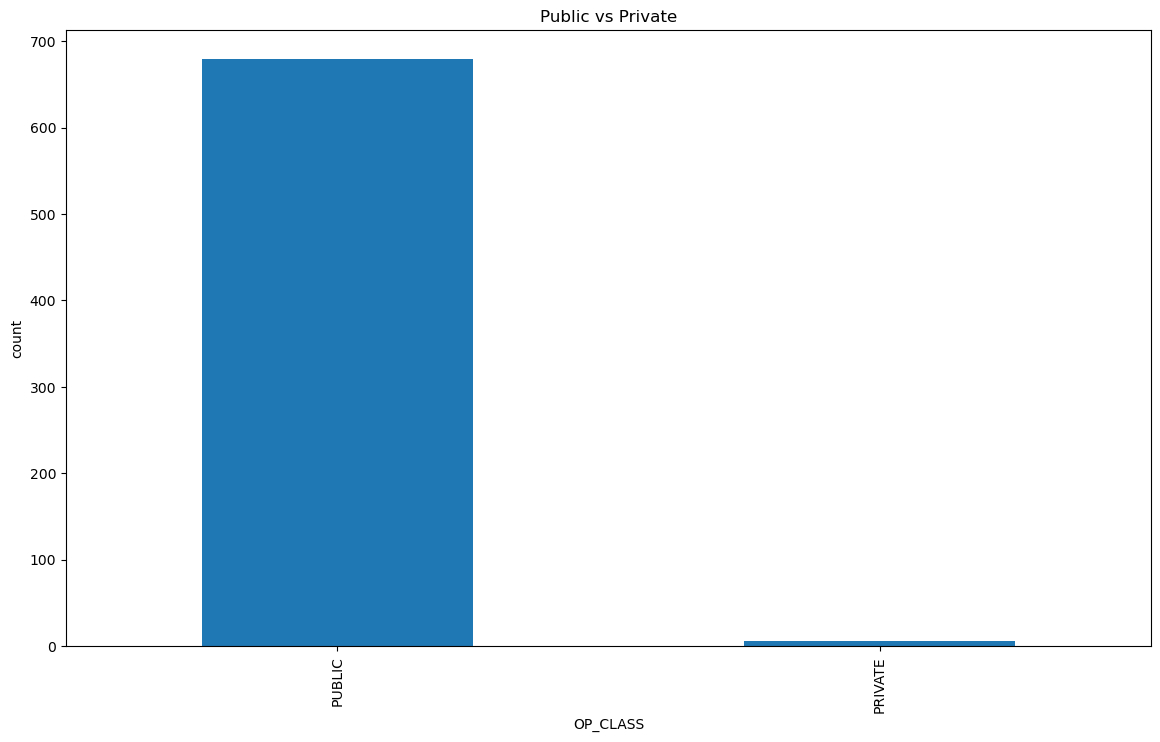

In [54]:
# First I want to filter the original dataset to only contain PaLm beach county parks
Palm_Beach_Parks = Florida_Parks_df[Florida_Parks_df["COUNTY"] == "PALM BEACH"]

#Then I will create a bar chart that will show how many parks are Private or Public in Palm Beach County
ax = Palm_Beach_Parks["OP_CLASS"].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Public vs Private")
ax.set_xlabel("OP_CLASS")
ax.set_ylabel("count")


> Wow! Looks like the VAST majority of the parks here in Palm Beach County are overwhelmingly public! I wonder which ones are the private ones..

In [57]:
Private_Parks = Palm_Beach_Parks[Palm_Beach_Parks["OP_CLASS"] == "PRIVATE"]
City_Of_Private_Parks = Private_Parks["CITY"]
print(City_Of_Private_Parks)

8139            BOCA RATON
8146         BOYNTON BEACH
8147         BOYNTON BEACH
8178       WEST PALM BEACH
8881    PALM BEACH GARDENS
9198            BOCA RATON
Name: CITY, dtype: object


> Interesting so it seems like 66.67% of all of the Private Parks are located in both Boyton Beach and Boca Raton, the southern half of Palm Beach County

#### Second I will load the Transit Data (bus stops)

In [59]:
PB_busstops_df = pd.read_csv('Final Tutorial/Data/Bus_Stops.csv')

In [60]:
PB_busstops_df.head()

,X,Y,OBJECTID,STOPNUM,STOPABBR,STOPNAME,ONSTREET,ATSTREET,LON,LAT,...,TELEPHONE,BICYCLE,TPFIELD00,TPFIELD01,TPFIELD02,TPFIELD03,NODEABBR,LINEABBR,LINENAME,LINEDIRID
0,965158.304762,868684.445238,1,NaN,100,DIXIE HWY @ 8TH ST,NaN,NaN,-80053424,26720404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,947891.659524,910915.738095,2,NaN,1000,MILITARY TRL @ LARCH AVE,NaN,NaN,-80105404,26836914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,947865.353968,910020.874603,3,NaN,1001,MILITARY TRL & JOHNSON DAIRY RD,NaN,NaN,-80105504,26834453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,947826.810317,908548.257143,4,NaN,1002,MILITARY TRL @ BURNS RD,NaN,NaN,-80105654,26830403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,947801.318254,907213.150794,5,NaN,1003,MILITARY TRL & LILAC,NaN,NaN,-80105761,26826731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Here I will find the dimensions of this dataset, this will show me the number of stops as well as the number of columns 
PB_busstops_df.shape

(2979, 28)

In [61]:
PB_busstops_df.columns

Index(['X', 'Y', 'OBJECTID', 'STOPNUM', 'STOPABBR', 'STOPNAME', 'ONSTREET',
       'ATSTREET', 'LON', 'LAT', 'FACINGDIR', 'CURBTYPE', 'INSERVICE',
       'PREFERRED', 'BENCH', 'SHELTER', 'LIGHTING', 'GARBAGE', 'TELEPHONE',
       'BICYCLE', 'TPFIELD00', 'TPFIELD01', 'TPFIELD02', 'TPFIELD03',
       'NODEABBR', 'LINEABBR', 'LINENAME', 'LINEDIRID'],
      dtype='object')

> Looks like we have some interesting metrics here! I wonder how many bustops are on Miltary Trail...

### EDA on Bus Stop Locations

In [64]:
# I will filter for bus stops that fall along military trail by taking the string and grabbing all of the values that contain "MILITARY TRL"
military_trl_stops = PB_busstops_df[PB_busstops_df["STOPNAME"].str.contains("MILITARY TRL", na=False)]

In [69]:
military_trl_stops.shape

(347, 28)

> That means that about 11.65% of all of the bus stops in Palm Beach County Falls on Military Trail!

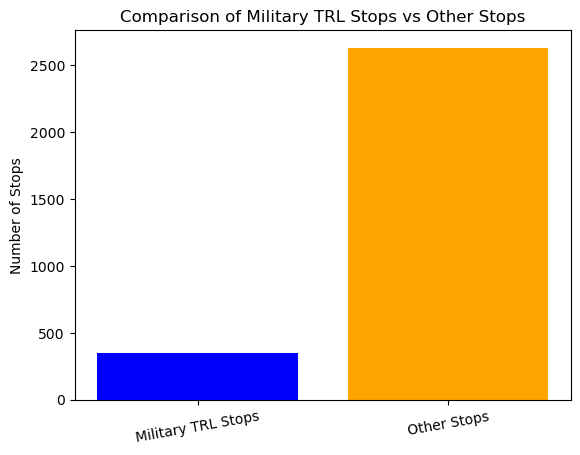

In [72]:
#Here is a bar chart showing the number of stops that land on Military Trail versus the other ones

# Count the number of stops
military_count = len(military_trl_stops)
total_count = len(PB_busstops_df)
non_military_count = total_count - military_count

# Prepare data for the bar graph
categories = ['Military TRL Stops', 'Other Stops']
counts = [military_count, non_military_count]

# Create the bar graph
plt.bar(categories, counts, color=['blue', 'orange'])
plt.ylabel('Number of Stops')
plt.title('Comparison of Military TRL Stops vs Other Stops')
plt.xticks(rotation=10)  # Rotate x labels if needed
plt.show()